In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [38]:
df1 = pd.read_csv(r'C:\Users\zheng\Downloads\accepted_2007_to_2018Q4.csv.gz')

C:\Users\zheng\AppData\Local\Temp\ipykernel_32884\1693717651.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.

  df1 = pd.read_csv(r'C:\Users\zheng\Downloads\accepted_2007_to_2018Q4.csv.gz')


In [39]:
df1['issue_d'] = pd.to_datetime(df1['issue_d'])
df=df1[(df1['issue_d']>'2016-01-01')&(df1['issue_d']<'2019-01-01')]

C:\Users\zheng\AppData\Local\Temp\ipykernel_32884\1081388848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

  df1['issue_d'] = pd.to_datetime(df1['issue_d'])


In [40]:
df=df1.copy()
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
pd.options.display.max_rows=9999
for column in df.columns:
    print(column)

id

member_id

loan_amnt

funded_amnt

funded_amnt_inv

term

int_rate

installment

grade

sub_grade

emp_title

emp_length

home_ownership

annual_inc

verification_status

issue_d

loan_status

pymnt_plan

url

desc

purpose

title

zip_code

addr_state

dti

delinq_2yrs

earliest_cr_line

fico_range_low

fico_range_high

inq_last_6mths

mths_since_last_delinq

mths_since_last_record

open_acc

pub_rec

revol_bal

revol_util

total_acc

initial_list_status

out_prncp

out_prncp_inv

total_pymnt

total_pymnt_inv

total_rec_prncp

total_rec_int

total_rec_late_fee

recoveries

collection_recovery_fee

last_pymnt_d

last_pymnt_amnt

next_pymnt_d

last_credit_pull_d

last_fico_range_high

last_fico_range_low

collections_12_mths_ex_med

mths_since_last_major_derog

policy_code

application_type

annual_inc_joint

dti_joint

verification_status_joint

acc_now_delinq

tot_coll_amt

tot_cur_bal

open_acc_6m

open_act_il

open_il_12m

open_il_24m

mths_since_rcnt_il

total_bal_il

il_util



In [42]:
Columnstokeep = ['annual_inc','application_type','bc_util','chargeoff_within_12_mths','delinq_2yrs','dti','emp_length','fico_range_high','fico_range_low','grade','home_ownership','installment','int_rate','loan_amnt','loan_status','mort_acc','mths_since_recent_inq','num_op_rev_tl','purpose','revol_util','term','hardship_flag']
Columnstokeep

['annual_inc',
 'application_type',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_2yrs',
 'dti',
 'emp_length',
 'fico_range_high',
 'fico_range_low',
 'grade',
 'home_ownership',
 'installment',
 'int_rate',
 'loan_amnt',
 'loan_status',
 'mort_acc',
 'mths_since_recent_inq',
 'num_op_rev_tl',
 'purpose',
 'revol_util',
 'term',
 'hardship_flag']

In [43]:
df=df[Columnstokeep]
default=df[df['loan_status'] =='Default']
print(df.shape)
print(default.shape)

(2260701, 22)

(40, 22)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2260701 entries, 0 to 2260700

Data columns (total 22 columns):

 #   Column                    Dtype  

---  ------                    -----  

 0   annual_inc                float64

 1   application_type          object 

 2   bc_util                   float64

 3   chargeoff_within_12_mths  float64

 4   delinq_2yrs               float64

 5   dti                       float64

 6   emp_length                object 

 7   fico_range_high           float64

 8   fico_range_low            float64

 9   grade                     object 

 10  home_ownership            object 

 11  installment               float64

 12  int_rate                  float64

 13  loan_amnt                 float64

 14  loan_status               object 

 15  mort_acc                  float64

 16  mths_since_recent_inq     float64

 17  num_op_rev_tl             float64

 18  purpose                   object 

 19  revol_util                float64

 20 

In [45]:
df.select_dtypes('object').head()

,application_type,emp_length,grade,home_ownership,loan_status,purpose,term,hardship_flag
0,Individual,10+ years,C,MORTGAGE,Fully Paid,debt_consolidation,36 months,N
1,Individual,10+ years,C,MORTGAGE,Fully Paid,small_business,36 months,N
2,Joint App,10+ years,B,MORTGAGE,Fully Paid,home_improvement,60 months,N
3,Individual,10+ years,C,MORTGAGE,Current,debt_consolidation,60 months,N
4,Individual,3 years,F,MORTGAGE,Fully Paid,major_purchase,60 months,N


In [46]:
for i in df.select_dtypes('object').columns:
    print(i,df[i].unique())
    print(i,df[i].isnull().sum())

application_type ['Individual' 'Joint App' nan]

application_type 33

emp_length ['10+ years' '3 years' '4 years' '6 years' '1 year' '7 years' '8 years'

 '5 years' '2 years' '9 years' '< 1 year' nan]

emp_length 146940

grade ['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]

grade 33

home_ownership ['MORTGAGE' 'RENT' 'OWN' 'ANY' nan 'NONE' 'OTHER']

home_ownership 33

loan_status ['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'

 'Late (31-120 days)' 'Late (16-30 days)' 'Default' nan

 'Does not meet the credit policy. Status:Fully Paid'

 'Does not meet the credit policy. Status:Charged Off']

loan_status 33

purpose ['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'

 'credit_card' 'other' 'house' 'vacation' 'car' 'medical' 'moving'

 'renewable_energy' 'wedding' 'educational' nan]

purpose 33

term [' 36 months' ' 60 months' nan]

term 33

hardship_flag ['N' 'Y' nan]

hardship_flag 33


In [47]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [48]:
df['term'] = df['term'].replace(' month?', '', regex=True).replace('s','',regex=True)
df['emp_length'] = df['emp_length'].replace(' years', '', regex=True).replace('10+', '11').replace('1 year','1').replace('< 1 year','0')
df['grade'] = df['grade'].replace('G','1').replace('F','2').replace('E','3').replace('D','4').replace('C','5').replace('B','6').replace('A','7')
df.loc[:, 'hardship_flag'] = df.loc[:, 'hardship_flag'].replace({'Y': '1', 'N': '0'})
df['home_ownership'] = df['home_ownership'].replace('ANY',np.nan).replace('NONE',np.nan).replace('OTHER',np.nan).replace({'RENT':'1','MORTGAGE':'2','OWN':'3'})
df['loan_status'] = df['loan_status'].replace({'Fully Paid':'0','Does not meet the credit policy. Status:Fully Paid':'0','Current':'0','Charged Off':'1','Does not meet the credit policy. Status:Charged Off':'1','In Grace Period':np.nan,'Late (31-120 days)':np.nan,'Late (16-30 days)':np.nan,'Default':'1'})
df['loan_status'].value_counts()

loan_status
0    1957056
1     269360
Name: count, dtype: int64

In [49]:
df.dropna(subset=['term'],inplace=True)
df.dropna(subset=['loan_status'],inplace=True)

In [50]:
df['loan_status'] = df['loan_status'].astype(float)
df['term'] = df['term'].astype(int)
df['home_ownership'] = df['home_ownership'].astype(float)
df['grade'] = df['grade'].astype(float)
df['emp_length'] = df['emp_length'].astype(float)
df.loc[:, 'hardship_flag'] = df.loc[:, 'hardship_flag'].astype(float)

In [51]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

mths_since_recent_inq       0.131374
emp_length                  0.064687
bc_util                     0.033944
num_op_rev_tl               0.031565
mort_acc                    0.022471
revol_util                  0.000792
dti                         0.000751
home_ownership              0.000542
chargeoff_within_12_mths    0.000065
delinq_2yrs                 0.000013
annual_inc                  0.000002
loan_status                 0.000000
term                        0.000000
purpose                     0.000000
installment                 0.000000
loan_amnt                   0.000000
int_rate                    0.000000
application_type            0.000000
grade                       0.000000
fico_range_low              0.000000
fico_range_high             0.000000
hardship_flag               0.000000
dtype: float64

In [52]:
df.dropna(subset=['mths_since_recent_inq','bc_util','num_op_rev_tl','mort_acc','revol_util','dti','chargeoff_within_12_mths','delinq_2yrs','home_ownership'],inplace=True)
Meanemplength = df['emp_length'].mean()
df['emp_length'].fillna(Meanemplength,inplace=True)
df.isnull().sum()

C:\Users\zheng\AppData\Local\Temp\ipykernel_32884\1096698073.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





  df['emp_length'].fillna(Meanemplength,inplace=True)


annual_inc                  0
application_type            0
bc_util                     0
chargeoff_within_12_mths    0
delinq_2yrs                 0
dti                         0
emp_length                  0
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
installment                 0
int_rate                    0
loan_amnt                   0
loan_status                 0
mort_acc                    0
mths_since_recent_inq       0
num_op_rev_tl               0
purpose                     0
revol_util                  0
term                        0
hardship_flag               0
dtype: int64

In [53]:
df['Fico Score']=(df['fico_range_high']+df['fico_range_low'])/2
df=df.drop(['fico_range_high','fico_range_low'],axis=1)

array([[<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'bc_util'}>,
        <Axes: title={'center': 'chargeoff_within_12_mths'}>,
        <Axes: title={'center': 'delinq_2yrs'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'emp_length'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'home_ownership'}>],
       [<Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'mths_since_recent_inq'}>,
        <Axes: title={'center': 'num_op_rev_tl'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'Fico Score'}>, <Axes: >, <Axes: >]],
      dtype=object)

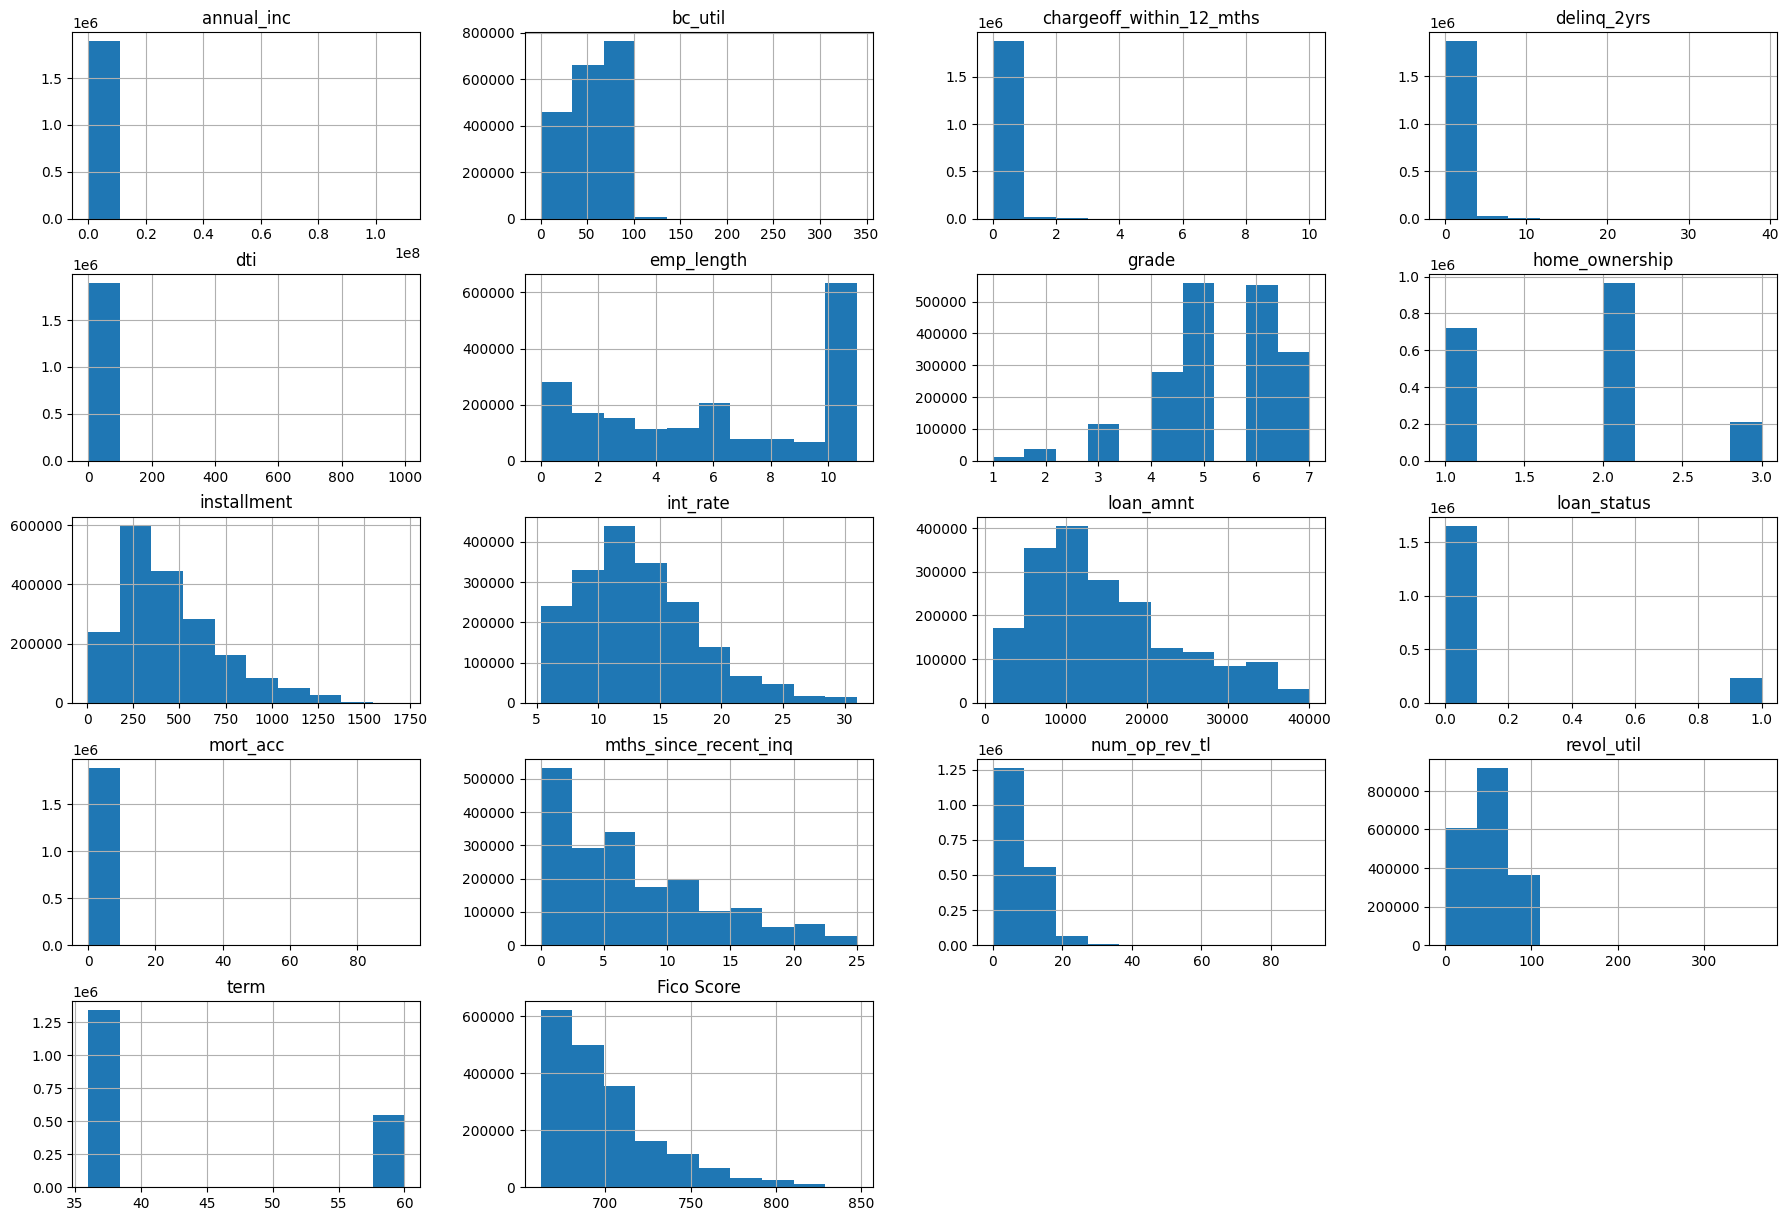

In [54]:
df.hist(bins = 10, figsize = (22,15))

In [55]:
df.select_dtypes('float').corr()

,annual_inc,bc_util,chargeoff_within_12_mths,delinq_2yrs,dti,emp_length,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mort_acc,mths_since_recent_inq,num_op_rev_tl,revol_util,Fico Score
annual_inc,1.000000,0.005937,0.003840,0.023659,-0.083163,0.041440,0.051269,0.051792,0.182650,-0.052241,0.189903,-0.025475,0.129267,-0.027237,0.052439,0.030090,0.040475
bc_util,0.005937,1.000000,-0.009037,0.003284,0.117199,0.030367,-0.281608,-0.023719,0.074169,0.275348,0.048339,0.076863,0.023972,0.084209,-0.147201,0.865210,-0.496966
chargeoff_within_12_mths,0.003840,-0.009037,1.000000,0.141662,-0.004601,0.009116,-0.014832,0.003313,-0.002136,0.012963,-0.004876,0.005001,0.027575,-0.007724,0.003691,-0.010272,-0.053528
delinq_2yrs,0.023659,0.003284,0.141662,1.000000,-0.015847,0.023019,-0.060063,0.032835,-0.000280,0.054731,-0.011623,0.020055,0.072016,-0.029400,0.006889,0.001463,-0.172029
dti,-0.083163,0.117199,-0.004601,-0.015847,1.000000,0.011076,-0.116692,0.019409,0.038536,0.121585,0.037087,0.035789,-0.015383,0.006318,0.111551,0.114225,-0.016862
emp_length,0.041440,0.030367,0.009116,0.023019,0.011076,1.000000,0.008998,0.152259,0.060786,-0.012400,0.073587,-0.009005,0.186215,0.001823,0.112681,0.035403,0.023018
grade,0.051269,-0.281608,-0.014832,-0.060063,-0.116692,0.008998,1.000000,0.056898,-0.112420,-0.954410,-0.095818,-0.228983,0.088940,0.151885,0.020571,-0.267197,0.409317
home_ownership,0.051792,-0.023719,0.003313,0.032835,0.019409,0.152259,0.056898,1.000000,0.091625,-0.058587,0.111968,-0.041833,0.313468,-0.041784,0.077695,-0.012519,0.095616
installment,0.182650,0.074169,-0.002136,-0.000280,0.038536,0.060786,-0.112420,0.091625,1.000000,0.120635,0.945469,0.029857,0.187339,-0.011865,0.155965,0.123318,0.062674
int_rate,-0.052241,0.275348,0.012963,0.054731,0.121585,-0.012400,-0.954410,-0.058587,0.120635,1.000000,0.093928,0.204715,-0.099089,-0.146118,-0.024675,0.262582,-0.403930


In [56]:
df=df.drop(['revol_util'],axis=1)

In [57]:
columns_to_encode = ['application_type', 'purpose']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded=df_encoded.replace({True:1,False:0})
print(df_encoded.info())

C:\Users\zheng\AppData\Local\Temp\ipykernel_32884\2863567502.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

  df_encoded=df_encoded.replace({True:1,False:0})


<class 'pandas.core.frame.DataFrame'>

Index: 1892953 entries, 0 to 2260698

Data columns (total 34 columns):

 #   Column                       Dtype  

---  ------                       -----  

 0   annual_inc                   float64

 1   bc_util                      float64

 2   chargeoff_within_12_mths     float64

 3   delinq_2yrs                  float64

 4   dti                          float64

 5   emp_length                   float64

 6   grade                        float64

 7   home_ownership               float64

 8   installment                  float64

 9   int_rate                     float64

 10  loan_amnt                    float64

 11  loan_status                  float64

 12  mort_acc                     float64

 13  mths_since_recent_inq        float64

 14  num_op_rev_tl                float64

 15  term                         int32  

 16  hardship_flag                float64

 17  Fico Score                   float64

 18  application_type_Individ

In [58]:
y = df_encoded['loan_status']
x = df_encoded.drop(['loan_status'],axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [60]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [62]:
'''param_grid = {
    'max_depth': [7, 8, 9],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', verbose=1)

grid_search.fit(X_train, y_train)'''

"param_grid = {\n    'max_depth': [7, 8, 9],\n    'n_estimators': [50, 100, 150],\n    'learning_rate': [0.01, 0.1, 0.2]\n}\n\ngrid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', verbose=1)\n\ngrid_search.fit(X_train, y_train)"

In [65]:
'''print("Best parameters found: ", grid_search.best_params_)'''

'print("Best parameters found: ", grid_search.best_params_)'

In [66]:
param_grid2 = {
    'max_depth': [5,6,7],
    'n_estimators': [150,200,250],
    'learning_rate': [0.2,0.3,0.4]
}

grid_search2 = GridSearchCV(xgb_model, param_grid2, cv=5, scoring='roc_auc', verbose=1)

grid_search2.fit(X_train, y_train)
print("Best parameters found: ", grid_search2.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 250}


In [67]:
best_xgb = grid_search2.best_estimator_
probabilities = best_xgb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, probabilities)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7546669751326347


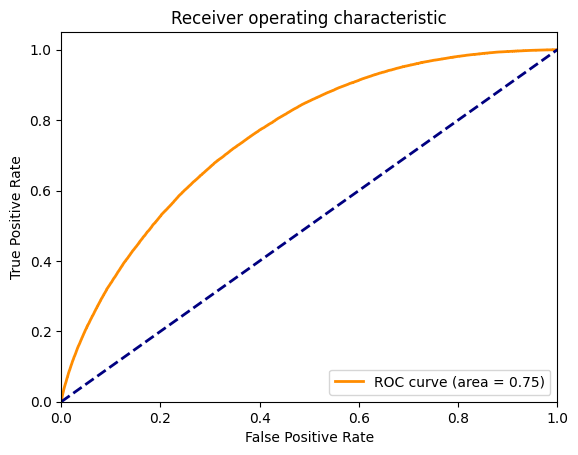

In [68]:
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [78]:
logloss = log_loss(y_test, probabilities)
print("Log Loss:", logloss)
predicted_labels = best_xgb.predict(X_test)  # Convert probabilities to labels
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)
threshold = 0.5
predicted_labels_binary = (probabilities > threshold).astype(int)
accuracy = accuracy_score(y_test, predicted_labels_binary)
print("Accuracy of the Probability (threshold 0.5):", accuracy)
f1_score1 = f1_score(y_test, predicted_labels_binary)
print("f1 Score (threshold 0.5):", f1_score1)

Log Loss: 0.32958746234322894

Confusion Matrix:

[[330584    655]

 [ 46629    723]]

Accuracy of the Probability (threshold 0.5): 0.8751053247435887

f1 Score (threshold 0.5): 0.02967371229222245


In [70]:
xgb_model2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1))

In [71]:
'''param_grid3 = {
    'max_depth': [7, 8, 9],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search3 = GridSearchCV(xgb_model2, param_grid3, cv=5, scoring='f1', verbose=1)

grid_search3.fit(X_train, y_train)
print("Best parameters found: ", grid_search3.best_params_)'''

'param_grid3 = {\n    \'max_depth\': [7, 8, 9],\n    \'n_estimators\': [50, 100, 150],\n    \'learning_rate\': [0.01, 0.1, 0.2]\n}\n\ngrid_search3 = GridSearchCV(xgb_model2, param_grid3, cv=5, scoring=\'f1\', verbose=1)\n\ngrid_search3.fit(X_train, y_train)\nprint("Best parameters found: ", grid_search3.best_params_)'

In [73]:
'''param_grid4 = {
    'max_depth': [9, 10, 11],
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.1]
    }

grid_search4 = GridSearchCV(xgb_model2, param_grid4, cv=5, scoring='f1', verbose=1)

grid_search4.fit(X_train, y_train)
print("Best parameters found: ", grid_search4.best_params_)'''

'param_grid4 = {\n    \'max_depth\': [9, 10, 11],\n    \'n_estimators\': [150, 200, 250],\n    \'learning_rate\': [0.1]\n    }\n\ngrid_search4 = GridSearchCV(xgb_model2, param_grid4, cv=5, scoring=\'f1\', verbose=1)\n\ngrid_search4.fit(X_train, y_train)\nprint("Best parameters found: ", grid_search4.best_params_)'

In [79]:
param_grid5 = {
    'max_depth': [10],
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.1]
    }

grid_search5 = GridSearchCV(xgb_model2, param_grid5, cv=5, scoring='f1', verbose=1)

grid_search5.fit(X_train, y_train)
print("Best parameters found: ", grid_search5.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 250}


In [80]:
best_xgb2 = grid_search5.best_estimator_
probabilities2 = best_xgb2.predict_proba(X_test)[:, 1]

roc_auc2 = roc_auc_score(y_test, probabilities2)
print("ROC-AUC Score:", roc_auc2)

ROC-AUC Score: 0.7504716753328726


In [85]:
logloss = log_loss(y_test, probabilities2)
print("Log Loss:", logloss)
predicted_labels2 = best_xgb2.predict(X_test)  # Convert probabilities to labels
conf_matrix = confusion_matrix(y_test, predicted_labels2)
print("Confusion Matrix:")
print(conf_matrix)
threshold = 0.5
predicted_labels_binary2 = (probabilities2 > threshold).astype(int)
accuracy = accuracy_score(y_test, predicted_labels_binary2)
print("Accuracy of the Probability (threshold 0.5):", accuracy)
f1_score2 = f1_score(y_test, predicted_labels_binary2)
print("f1 Score (threshold 0.5):", f1_score2)

Log Loss: 0.5527910671224501

Confusion Matrix:

[[224874 106365]

 [ 14989  32363]]

Accuracy of the Probability (threshold 0.5): 0.6794588355243522

f1 Score (threshold 0.5): 0.3478396388650043


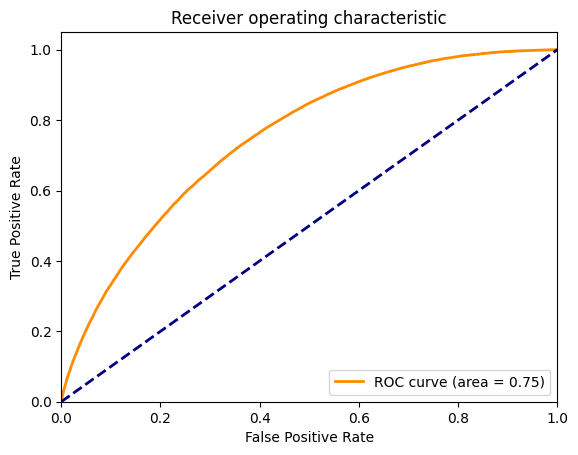

In [86]:
fpr2, tpr2, _2 = roc_curve(y_test, probabilities2)
roc_auc2 = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()